In [ ]:
#Importing important Liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read the CSV file
df = pd.read_csv('/content/TSLA.csv')

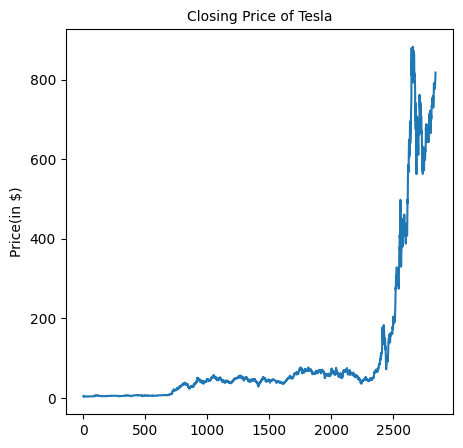

In [ ]:
#Line Plot
plt.figure(figsize=(5,5))
plt.plot(df['Close'])
plt.title('Closing Price of Tesla', fontsize=10)
plt.ylabel('Price(in $)')
plt.show()

In [ ]:
df = df.drop(['Adj Close'], axis=1)
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


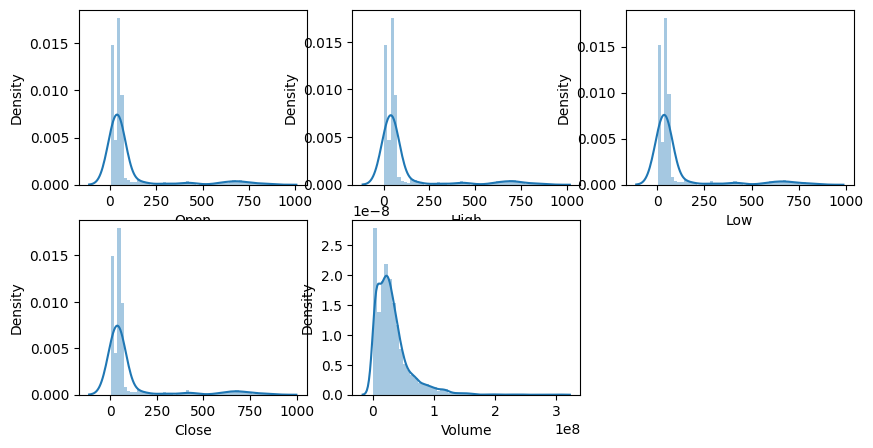

In [ ]:
#Define Features
all_features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(10,5))
#Distribution Plots
for i, column in enumerate(all_features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[column])
plt.show()

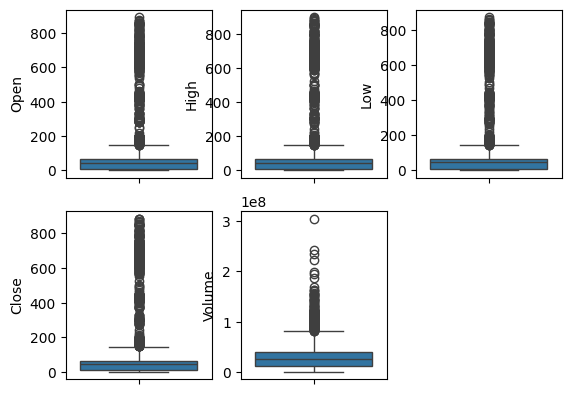

In [ ]:
#Box Plots
for i, column in enumerate(all_features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[column])
plt.show()

In [ ]:
#Splitting the Date Column into month, day and Year as well as calculating end of quarter
splitted_date = df['Date'].str.split('-', expand=True)
df['Month'] = splitted_date[1].astype(int)
df['Day'] = splitted_date[2].astype(int)
df['Year'] = splitted_date[0].astype(int)
df['End of Quarter'] = np.where(df['Month']%3==0,1,0)
df

,Date,Open,High,Low,Close,Volume,Month,Day,Year,End of Quarter,Open-Close,Low-High,Target
0,2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,7,1,2010,0,0.608000,-1.130000,0
1,2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,7,2,2010,0,0.760000,-0.878000,0
2,2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,7,6,2010,0,0.778000,-0.834000,0
3,2010-07-07,3.280000,3.326000,2.996000,3.160000,34608500,7,7,2010,0,0.120000,-0.330000,1
4,2010-07-08,3.228000,3.504000,3.114000,3.492000,38557000,7,8,2010,0,-0.264000,-0.390000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,2021-10-08,796.210022,796.380005,780.909973,785.489990,16711100,10,8,2021,0,10.720032,-15.470032,1
2839,2021-10-11,787.650024,801.239990,785.500000,791.940002,14200300,10,11,2021,0,-4.289978,-15.739990,1
2840,2021-10-12,800.929993,812.320007,796.570007,805.719971,22020000,10,12,2021,0,-4.789978,-15.750000,1
2841,2021-10-13,810.469971,815.409973,805.780029,811.080017,14120100,10,13,2021,0,-0.610046,-9.629944,1


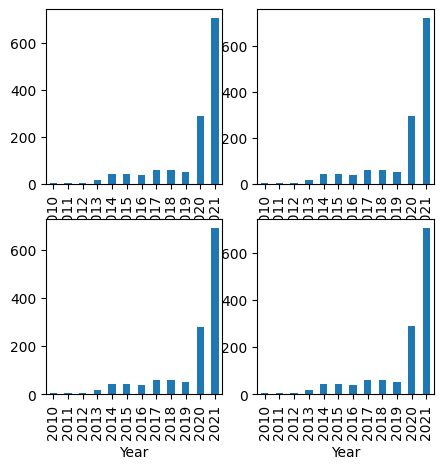

In [ ]:
grouped_data = df.drop('Date', axis=1).groupby('Year').mean()
plt.subplots(figsize=(5,5))
#Bar Plots
for i, column in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  grouped_data[column].plot.bar()
plt.show()

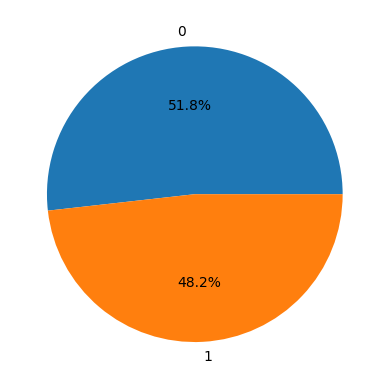

In [ ]:
df['Open-Close']  = df['Open'] - df['Close']
df['Low-High']  = df['Low'] - df['High']
df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
#Pie Chart
plt.pie(df['Target'].value_counts().values,labels=[0, 1], autopct='%1.1f%%')
plt.show()

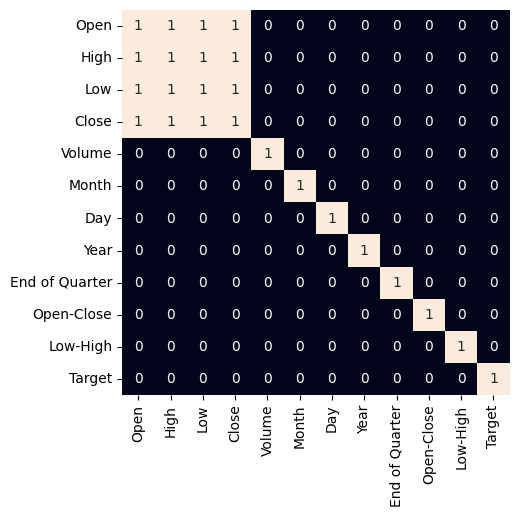

In [ ]:
numerical_df = df.drop('Date', axis=1)
#Heatmap
plt.figure(figsize=(5,5))
sb.heatmap(numerical_df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [ ]:
#Preparing for machine learning model training
new_features = df[['Open-Close', 'Low-High', 'End of Quarter']]
Target = df['Target']
scaler = StandardScaler()
new_features = scaler.fit_transform(new_features)
X_train, X_valid, Y_train, Y_valid = train_test_split(new_features, Target, test_size=0.1, random_state=2022)

In [ ]:
#ROC AUC scores for training and validation datasets
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]
for model in models:
  model.fit(X_train, Y_train)
  print(f'{model} : ')
  print('Accuracy in Training : ', metrics.roc_auc_score(Y_train, model.predict_proba(X_train)[:,1]))
  print('Accuracy in Validation : ', metrics.roc_auc_score(Y_valid, model.predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Accuracy in Training :  0.5244953041945524
Accuracy in Validation :  0.5346427161468614

SVC(kernel='poly', probability=True) : 
Accuracy in Training :  0.49297480575676067
Accuracy in Validation :  0.5073035925779708

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)